In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_csv('data3.csv')

In [3]:
data=data.ix[data.int_rt<0.15,:]
data['log']=np.log(data['mloan_amt'])
data['int']=np.exp(data['int_rt'])

In [10]:
data.head()

,cop_id,rownum,mloan_amt,int_sum,int_rt,cvrg,COP_CNT,GRP_ID,ACDT_YN,log,int
0,c013,1,4.190977e+07,253474.0,0.006048,9,560,0,N,17.551030,1.006066
1,c013,2,8.295361e+06,27391.0,0.003302,9,560,0,N,15.931207,1.003307
3,c013,4,3.195333e+06,24420.0,0.007642,9,560,0,N,14.977202,1.007672
4,c013,5,3.619595e+06,8531.0,0.002357,9,560,0,N,15.101873,1.002360
5,c013,6,1.312378e+06,43960.0,0.033496,9,560,0,N,14.087351,1.034064


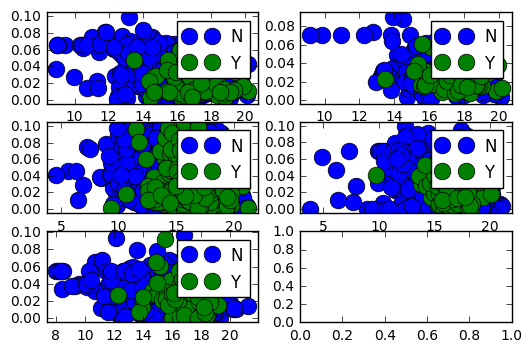

In [20]:
groups=data.groupby(['ACDT_YN'])
# Plot
fig, axes = plt.subplots(3,2)
plt.figure(figsize=(100, 100))
for index,i in enumerate(list(data.cop_id.unique())):
    axes[index/2,index%2].margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        axes[index/2,index%2].plot(group.log[(group.int_rt<0.1)&(group.cop_id==i)], group.int_rt[(group.int_rt<0.1)&(group.cop_id==i)], marker='o', linestyle='', ms=12, label=name)
    axes[index/2,index%2].legend()
plt.show()

In [149]:
groups.describe()

COP_CNT       GRP_ID         cvrg       int_rt  \
ACDT_YN                                                             
N       count  4865.000000  4865.000000  4865.000000  4865.000000   
        mean   3262.734224     9.442138     9.000000     0.039409   
        std    1889.018781     5.761251     0.000000     0.029998   
        min     310.000000     0.000000     9.000000     0.000000   
        25%    1567.000000     5.000000     9.000000     0.015657   
        50%    4834.000000    10.000000     9.000000     0.031711   
        75%    4834.000000    14.000000     9.000000     0.056655   
        max    4834.000000    20.000000     9.000000     0.149640   
Y       count   700.000000   700.000000   700.000000   700.000000   
        mean   3242.530000     9.840000     1.338571     0.028148   
        std    1948.543826     5.604780     0.473562     0.021817   
        min     310.000000     0.000000     1.000000     0.000000   
        25%     774.000000     5.000000     1.000000     0.013506   
        50%    4834.000000    10.000000     1.000000     0.022132   
        75%    4834.000000    15.000000     2.000000     0.036763   
        max    4834.000000    20.000000     2.000000     0.134404   

                    int_sum          log     mloan_amt       rownum  
ACDT_YN                                                              
N       count  4.865000e+03  4865.000000  4.865000e+03  4865.000000  
        mean   9.004583e+05    15.816369  3.739403e+07  1613.119836  
        std    2.061961e+06     2.184247  9.326575e+07  1425.172202  
        min    0.000000e+00     3.799636  4.468493e+01     1.000000  
        25%    6.259300e+04    14.657483  2.320940e+06   391.000000  
        50%    2.582650e+05    16.069613  9.526743e+06  1151.000000  
        75%    8.332450e+05    17.320689  3.328738e+07  2721.000000  
        max    3.672360e+07    21.271548  1.730279e+09  4832.000000  
Y       count  7.000000e+02   700.000000  7.000000e+02   700.000000  
        mean   1.045579e+06    16.686655  5.006679e+07  1630.741429  
        std    2.058540e+06     1.582874  1.038255e+08  1437.053850  
        min    0.000000e+00     9.360026  1.161468e+04     2.000000  
        25%    1.466528e+05    15.733167  6.804990e+06   350.750000  
        50%    4.304355e+05    16.791248  1.960425e+07  1118.500000  
        75%    1.085663e+06    17.785447  5.298127e+07  2797.750000  
        max    2.827031e+07    21.252237  1.697186e+09  4795.000000

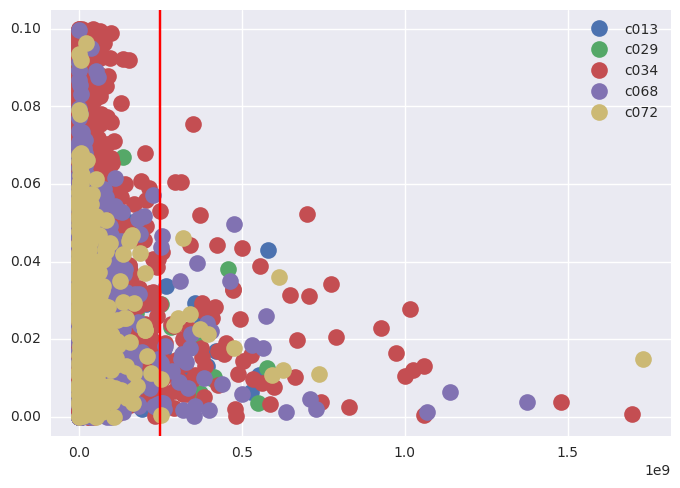

In [137]:
groups=data.groupby(['cop_id'])
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.mloan_amt[group.int_rt<0.1], group.int_rt[group.int_rt<0.1], marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.axvline(0.25e9, color='red', linestyle='solid')
plt.show()

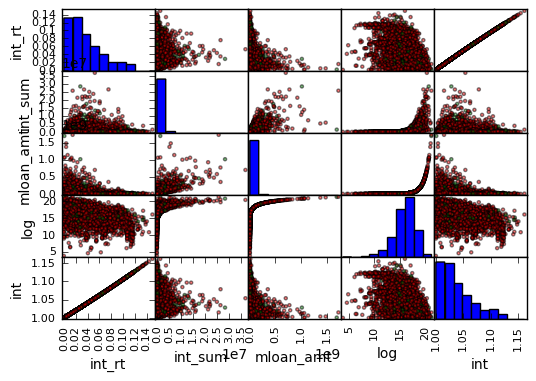

In [33]:
def colorw(x):
    colors=['r','g']
    if x=='N':
        return colors[0]
    else : return colors[1]
from pandas.tools import plotting
plotting.scatter_matrix(data[['int_rt','int_sum','mloan_amt','log','int']],c=data['ACDT_YN'].apply(colorw))
plt.show()

In [34]:
groups=data.groupby('cop_id')

In [36]:
data['int'].hist(by=data['cop_id'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007AA3B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAC3550>]], dtype=object)

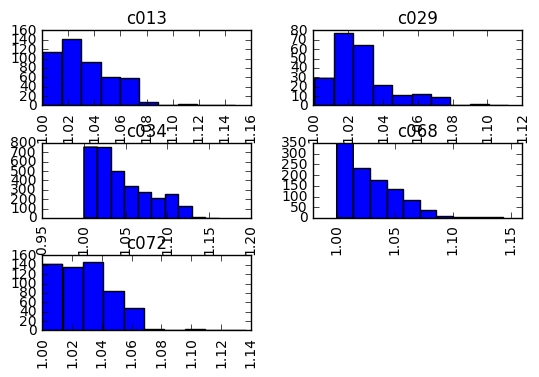

In [37]:
plt.show()